### Starting off:

Earlier we learned about PCA, what are other forms of dimensionality reduction that you are familiar with?

# Applying PCA to  a dataset

***FYI:*** PCA is typically used wth continuous variables or discrete ordinal variables. This is becasue they use variance as a measure of determining principal components. 

https://stats.stackexchange.com/questions/5774/can-principal-component-analysis-be-applied-to-datasets-containing-a-mix-of-cont

One alternative is to use FActor analysis instead.  

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [5]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()

In [11]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
cancer_df = pd.DataFrame(cancer['data'], columns=list(cancer['feature_names']))

In [20]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

## Why might you want to do a form of dimensionality reduction on this data?

In [21]:
print (len(cancer.data[cancer.target==1]))


357


In [22]:
import numpy as np
import matplotlib.pyplot as plt 

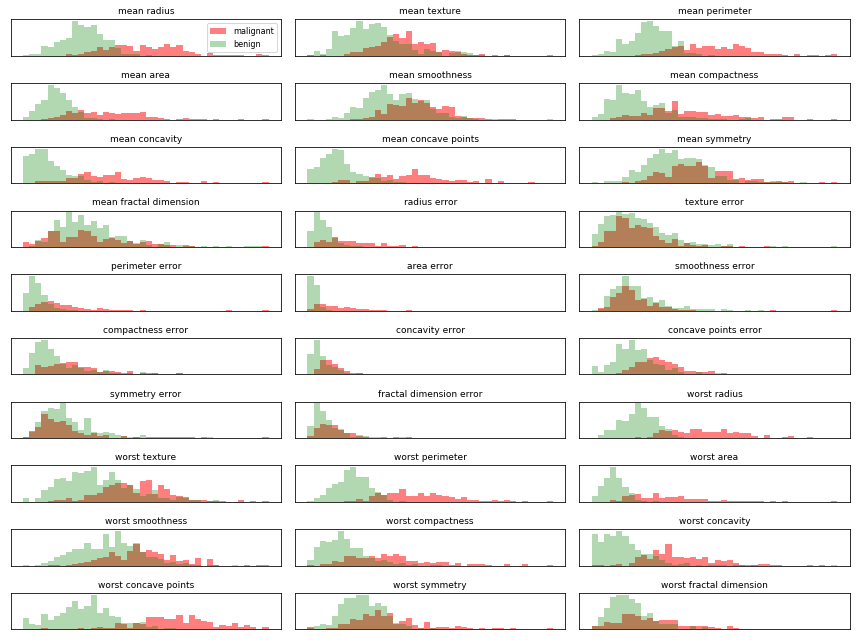

In [23]:
fig,axes =plt.subplots(10,3, figsize=(12, 9)) # 3 columns each containing 10 figures, total 30 features
malignant=cancer.data[cancer.target==0] # define malignant
benign=cancer.data[cancer.target==1] # define benign
ax=axes.ravel()# flat axes with numpy ravel
for i in range(30):
  _,bins=np.histogram(cancer.data[:,i],bins=40)
  ax[i].hist(malignant[:,i],bins=bins,color='r',alpha=.5)# red color for malignant class
  ax[i].hist(benign[:,i],bins=bins,color='g',alpha=0.3)# alpha is           for transparency in the overlapped region 
  ax[i].set_title(cancer.feature_names[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())
ax[0].legend(['malignant','benign'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

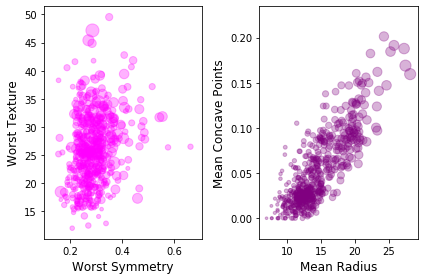

In [24]:
import pandas as pd
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)# just convert the scikit learn data-set to pandas data-frame.
plt.subplot(1,2,1)#fisrt plot
plt.scatter(cancer_df['worst symmetry'], cancer_df['worst texture'], s=cancer_df['worst area']*0.05, color='magenta', label='check', alpha=0.3)
plt.xlabel('Worst Symmetry',fontsize=12)
plt.ylabel('Worst Texture',fontsize=12)
plt.subplot(1,2,2)# 2nd plot
plt.scatter(cancer_df['mean radius'], cancer_df['mean concave points'], s=cancer_df['mean area']*0.05, color='purple', label='check', alpha=0.3)
plt.xlabel('Mean Radius',fontsize=12)
plt.ylabel('Mean Concave Points',fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()#instantiate
scaler.fit(X_train) # compute the mean and standard which will be used in the next command
X_train_scaled = scaler.transform(X_train)# fit and transform can be applied together and I leave that for simple exercise
X_test_scaled = scaler.transform(X_test)
# we can check the minimum and maximum of the scaled features which we expect to be 0 and 1
print ("after scaling minimum", X_train_scaled.min(axis=0) )

after scaling minimum [-1.98331111 -2.21220784 -1.94000195 -1.41936988 -3.17693457 -1.67256345
 -1.11319845 -1.24998427 -2.75560937 -1.85445424 -1.02191858 -1.4868881
 -1.02052074 -0.70421713 -1.71897011 -1.30222621 -1.07957012 -1.86438565
 -1.39523134 -1.04796104 -1.67939465 -2.17804228 -1.6511625  -1.18839672
 -2.74926775 -1.47787155 -1.32535194 -1.72016962 -2.27370502 -1.69959059]


In [27]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

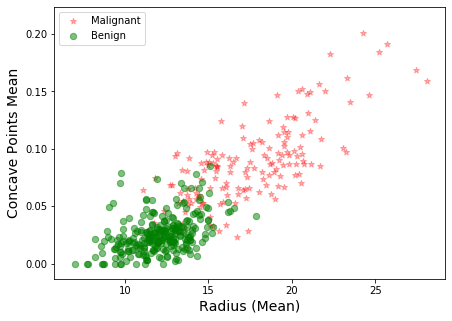

In [28]:
Xax=X_train[:,0]
Yax=X_train[:,7]
labels=y_train

cdict={0:'red',1:'green'}

labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("Radius (Mean)",fontsize=14)
plt.ylabel("Concave Points Mean",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [31]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test_scaled)

# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))


Accuracy:0.951048951048951
F1: 0.9608938547486033


In [32]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10) 
pca.fit(X_train_scaled) 
X_train_pca=pca.transform(X_train_scaled) 
X_test_pca=pca.transform(X_test_scaled) 
#let's check the shape of X_pca array
print("shape of X_train_pca", X_train_pca.shape)

shape of X_train_pca (426, 10)


In [33]:
ex_variance=np.var(X_train_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print(ex_variance_ratio )

[0.46810483 0.19065249 0.10452491 0.06787724 0.05843524 0.04217875
 0.02433104 0.01725787 0.01435421 0.01228341]


In [34]:
X_train_pca[:,:4]

array([[ 5.9436973 ,  3.56003194, -3.86460717,  3.55211743],
       [-0.39290435, -0.87432522, -1.09762243, -0.02238466],
       [ 0.24665791, -1.60066408, -0.81786414,  0.58431508],
       ...,
       [ 5.48370875,  1.12857284, -2.49006418,  1.35757387],
       [-2.28753802, -1.44403751,  0.19282863,  1.27440412],
       [-3.73108537, -1.48891715,  1.85473794,  0.68334844]])

In [35]:
knn = KNeighborsClassifier(n_neighbors=4) 
knn.fit(X_train_pca[:,:6], y_train)

# make class predictions for the testing set
y_pred_pca= knn.predict(X_test_pca[:,:6])

# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_pca)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_pca)))


Accuracy:0.958041958041958
F1: 0.9659090909090909


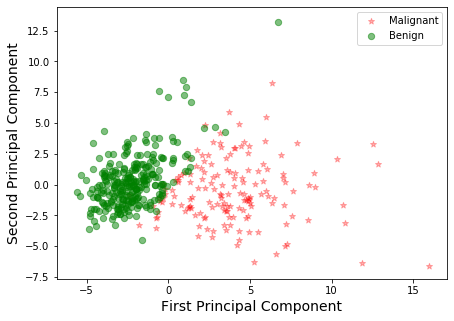

In [36]:
Xax=X_train_pca[:,0]
Yax=X_train_pca[:,1]
labels=y_train

cdict={0:'red',1:'green'}

labl={0:'Malignant',1:'Benign'}
marker={0:'*',1:'o'}
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for l in np.unique(labels):
 ix=np.where(labels==l)
 ax.scatter(Xax[ix],Yax[ix],c=cdict[l],s=40,
           label=labl[l],marker=marker[l],alpha=alpha[l])
# for loop ends
plt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.legend()
plt.show()
# please check the scatter plot of the remaining component and you will understand the difference

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


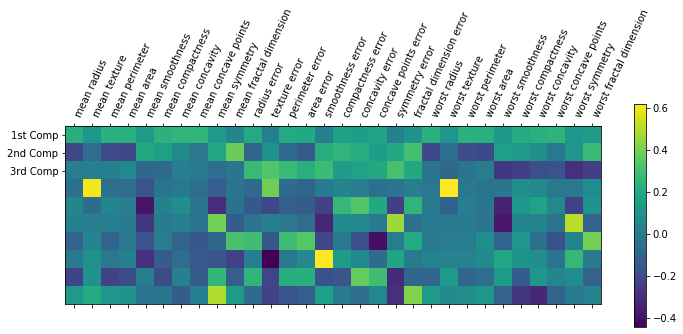

In [37]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2],['1st Comp','2nd Comp','3rd Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

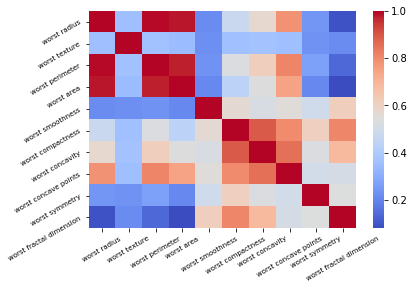

In [38]:
feature_worst=list(cancer_df.columns[20:31]) # select the 'worst' features
import seaborn as sns
s=sns.heatmap(cancer_df[feature_worst].corr(),cmap='coolwarm') 
s.set_yticklabels(s.get_yticklabels(),rotation=30,fontsize=7)
s.set_xticklabels(s.get_xticklabels(),rotation=30,fontsize=7)
plt.show()


Example taken from this webpage: https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21